## RQ3: AFFECTIVE STATE

In [ ]:
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from run_stats import *

### SURVEYS

In [ ]:
survey_data = pd.read_excel("Experimental_Data_revised.xlsx", "Surveys")
task_data = pd.read_excel("Experimental_Data_revised.xlsx", "Tasks")
mood_data = pd.read_excel("Experimental_Data_revised.xlsx", "Mood")

In [4]:
# Experimental data spreadsheet
# surveys sheet
important_columns = ['ABILITY', 'PERFORMANCE', 'DISTRACTED', 'COMFORTABLE', 
                     'ACCURATE', 'FOCUS', 'FEASIBLE']


ABILITY
FISH: [3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0]
LEMON: [4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
NEUTRAL: [1.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0]
neutral, num elements: 10, mean: 4.0, std: 1.3416407864998738, normal (above 0.5 is normal): 0.0029986510053277016
lemon, num elements: 10, mean: 4.7, std: 0.45825756949558405, normal (above 0.5 is normal): 4.713490488938987e-05
fish, num elements: 10, mean: 4.0, std: 0.7745966692414834, normal (above 0.5 is normal): 0.03521495312452316
Kruskal-Wallis: H 3.789405204460963, P VAL: 0.15036304603210499

PERFORMANCE
FISH: [2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0]
LEMON: [2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0]
NEUTRAL: [1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0]
neutral, num elements: 10, mean: 2.9, std: 0.8306623862918076, normal (above 0.5 is normal): 0.025551754981279373
lemon, num elements: 10, mean: 3.3, std: 0.7810249675906654, normal (above 0.5 is normal): 0.008499905467033386


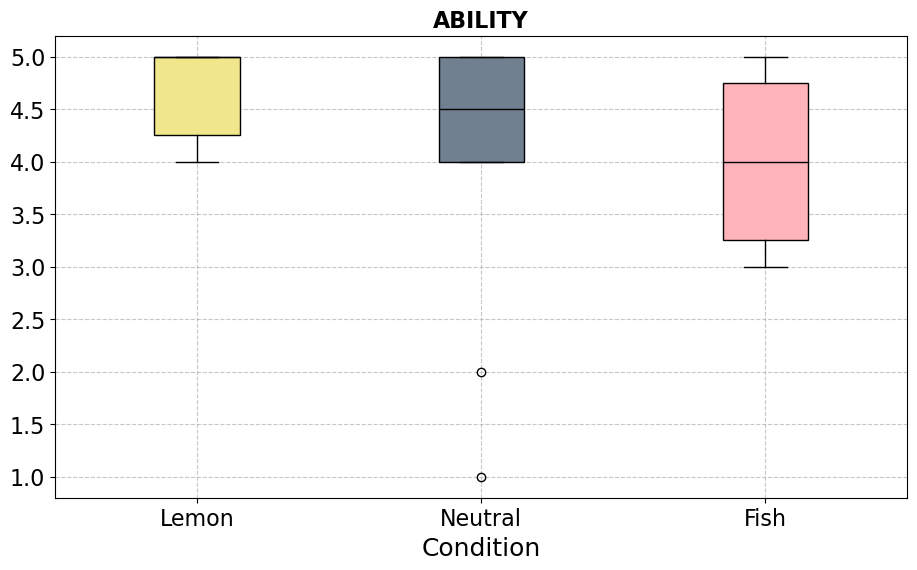

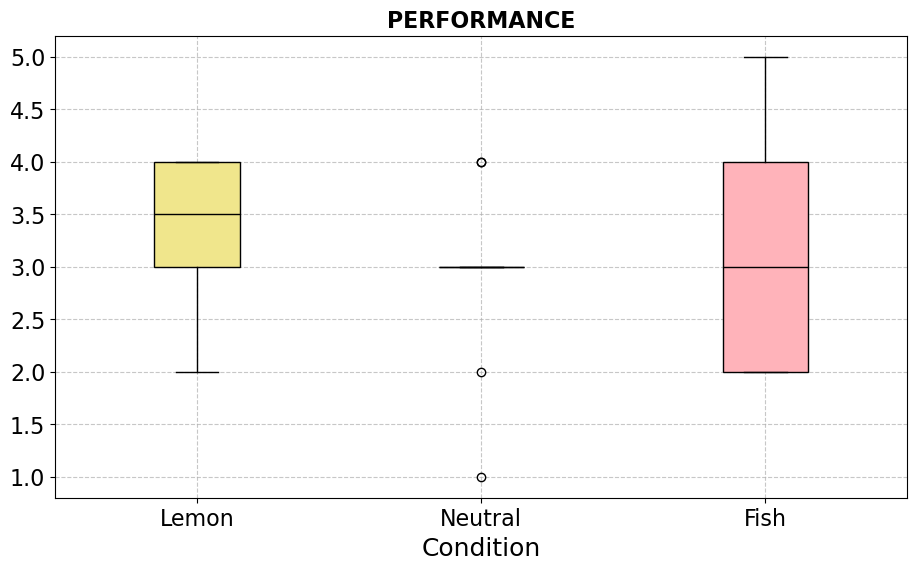

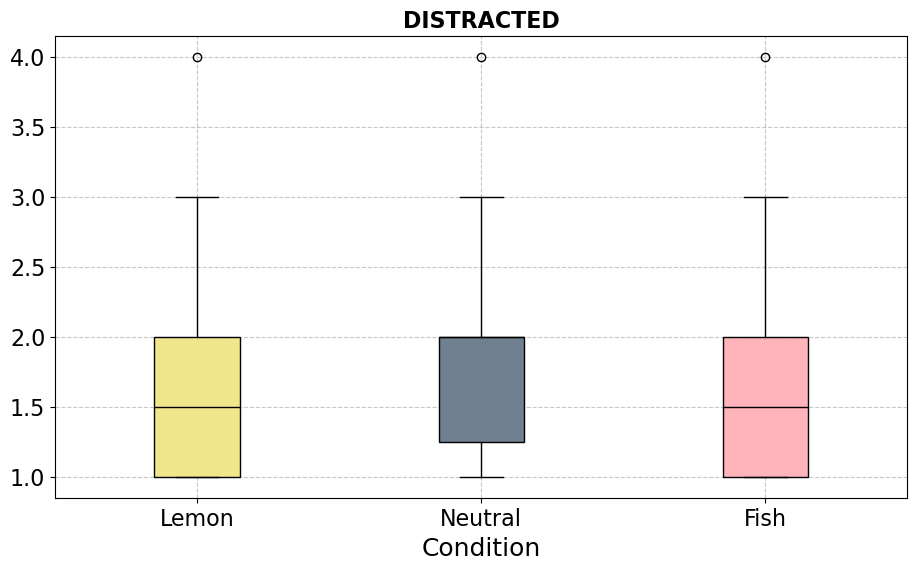

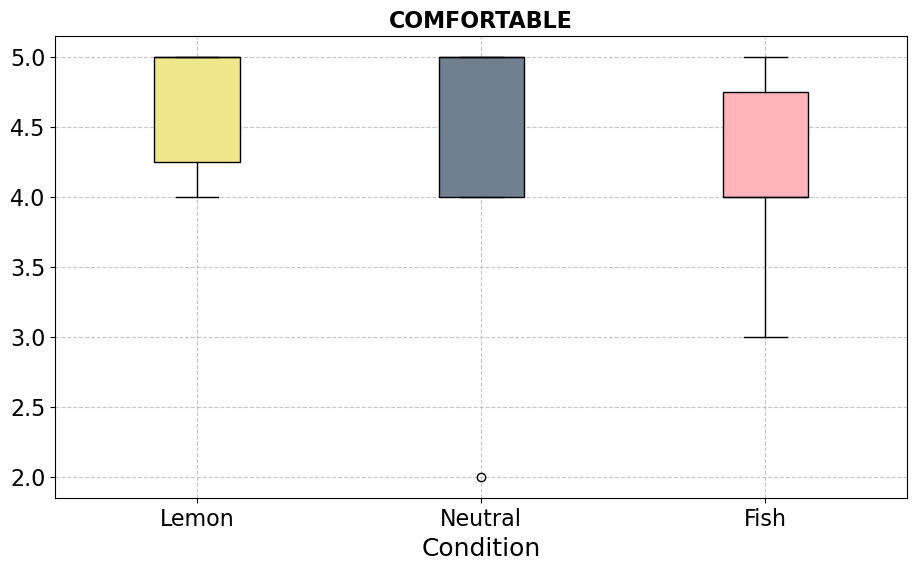

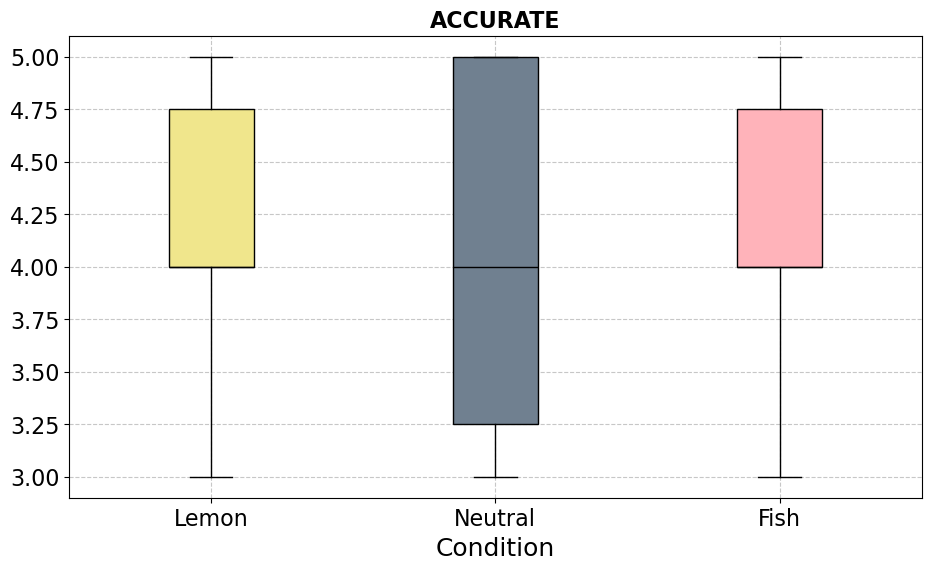

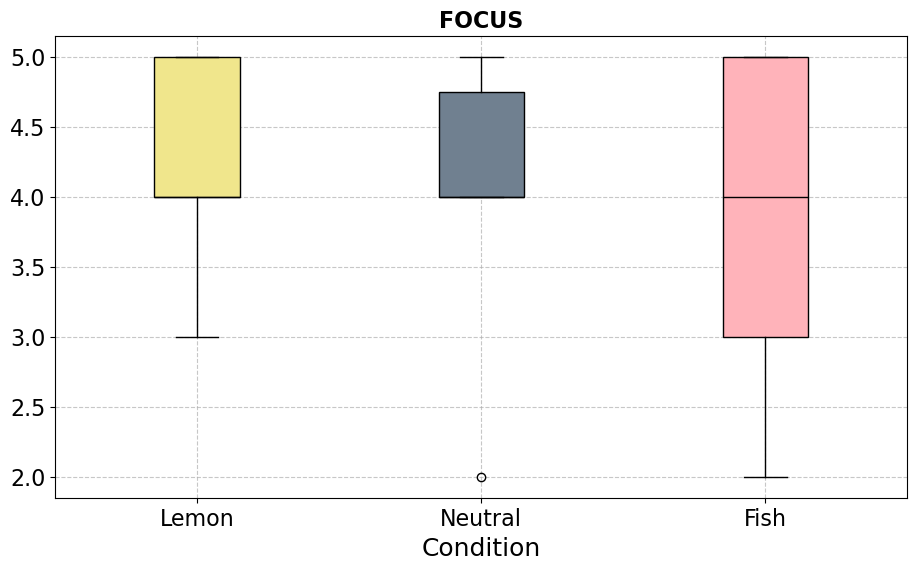

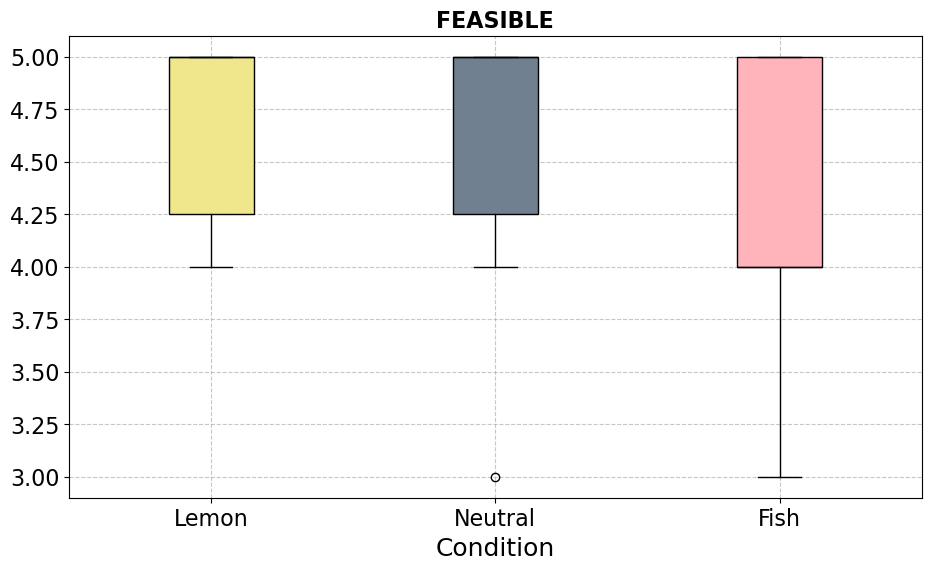

In [5]:
for col in important_columns:
    fish, lemon, neutral = make_three_group_lists(survey_data, col)
    three_lists_stats(fish, lemon, neutral, col, remove=False)

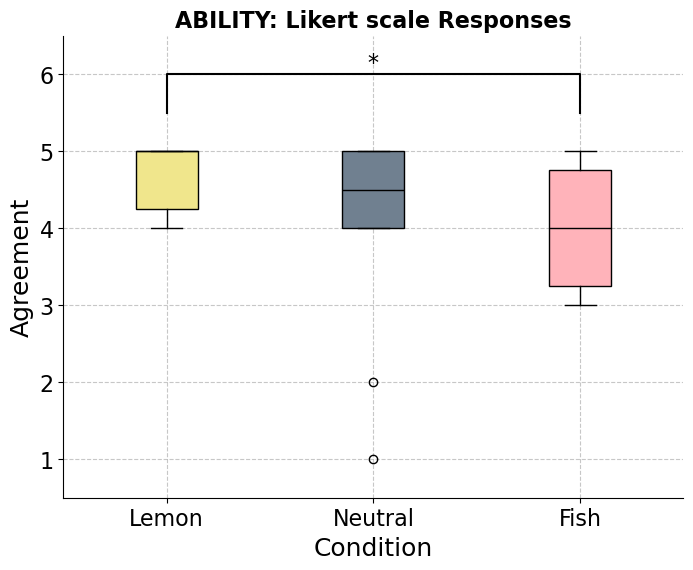

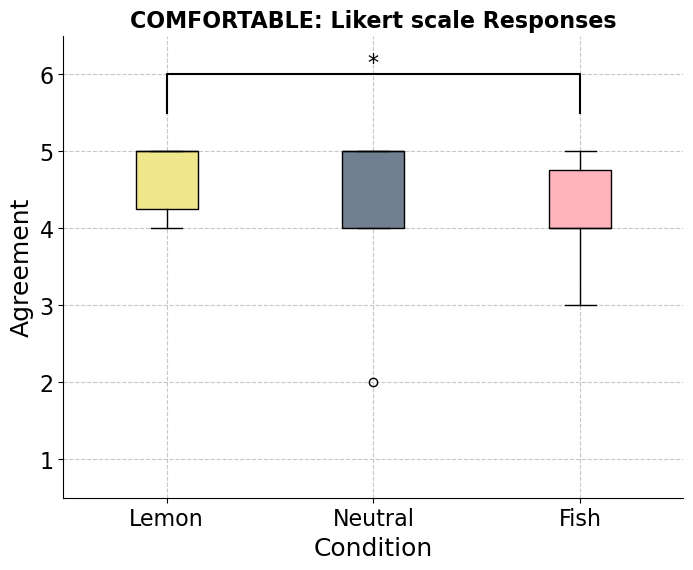

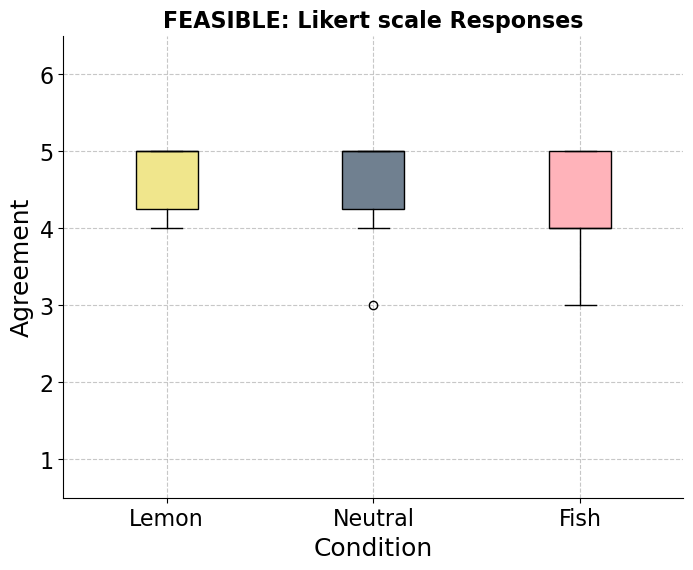

In [6]:
data_ability = {
    'fish' : [3, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [1, 2, 4, 4, 4, 5, 5, 5, 5, 5]
}

data_comfortable = {
    'fish': [3, 3, 4, 4, 4, 4, 4, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [2, 4, 4, 4, 5, 5, 5, 5, 5, 5]
}

data_feasible = {
    'fish': [3, 3, 4, 4, 4, 4, 5, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [3, 4, 4, 5, 5, 5, 5, 5, 5, 5]
}

# Revised colors for the plot
colors = ['#F0E68C', '#708090', '#FFB3BA']  # Softer yellow for Lemon, Slate Gray for Neutral, and keeping the existing color for Fish

# Plotting function for each dataset
def plot_box_and_whisker(data, title, outfname, sig):
    plt.figure(figsize=(8, 6))
    box = plt.boxplot(
        [data['lemon'], data['neutral'], data['fish']], 
        labels=['Lemon', 'Neutral', 'Fish'], 
        patch_artist=True, 
        boxprops=dict(facecolor='lightgray', color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black')
    )

    # Set individual colors for the boxes
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Adding title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Condition", fontsize=18)
    plt.ylabel("Agreement", fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Calculate p-value for significance between Lemon and Fish (e.g., using a t-test)
    t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

    if sig:
        # Adding the significance annotation
        x1, x2 = 1, 3  # positions for Lemon and Fish
        y, h, col = max(max(data['lemon']), max(data['fish'])) + 0.5, 0.5, 'black'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, f"*", ha='center', va='bottom', fontsize=16, color=col)
        
    ax = plt.gca()
    ax.set_ylim([0.5,6.5])

    # Remove top and right spines for a cleaner look
    sns.despine()
    plt.savefig(f"figures/likert_{outfname}.png", dpi=150)

    # Show the plot
    plt.show()

# Plotting each category
plot_box_and_whisker(data_ability, "ABILITY: Likert scale Responses", 'ability', sig=True)
plot_box_and_whisker(data_comfortable, "COMFORTABLE: Likert scale Responses", 'comfortable', sig=True)
plot_box_and_whisker(data_feasible, "FEASIBLE: Likert scale Responses", 'feasible', sig=False)

### PANAS

INIT_PANAS_POS
FISH: [16.0, 20.0, 27.0, 27.0, 27.0, 28.0, 29.0, 31.0, 32.0, 39.0]
LEMON: [15.0, 23.0, 25.0, 28.0, 28.0, 28.0, 34.0, 36.0, 36.0, 39.0]
NEUTRAL: [13.0, 14.0, 18.0, 22.0, 24.0, 24.0, 30.0, 31.0, 33.0, 38.0]
neutral, num elements: 10, mean: 24.7, std: 7.861933604400383, normal (above 0.5 is normal): 0.7884310483932495
lemon, num elements: 10, mean: 29.2, std: 6.881860213634101, normal (above 0.5 is normal): 0.5943338871002197
fish, num elements: 10, mean: 27.6, std: 5.96992462263972, normal (above 0.5 is normal): 0.5334285497665405
ANOVA F: 0.9701678060907398, P VAL: 0.39184355962049

INIT_PANAS_NEG
FISH: [10.0, 11.0, 11.0, 12.0, 12.0, 13.0, 15.0, 16.0, 17.0, 24.0]
LEMON: [10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 16.0]
NEUTRAL: [10.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0, 19.0]
neutral, num elements: 10, mean: 12.7, std: 2.4103941586387903, normal (above 0.5 is normal): 0.012368007563054562
lemon, num elements: 10, mean: 11.4, std: 1.7435595774162693,

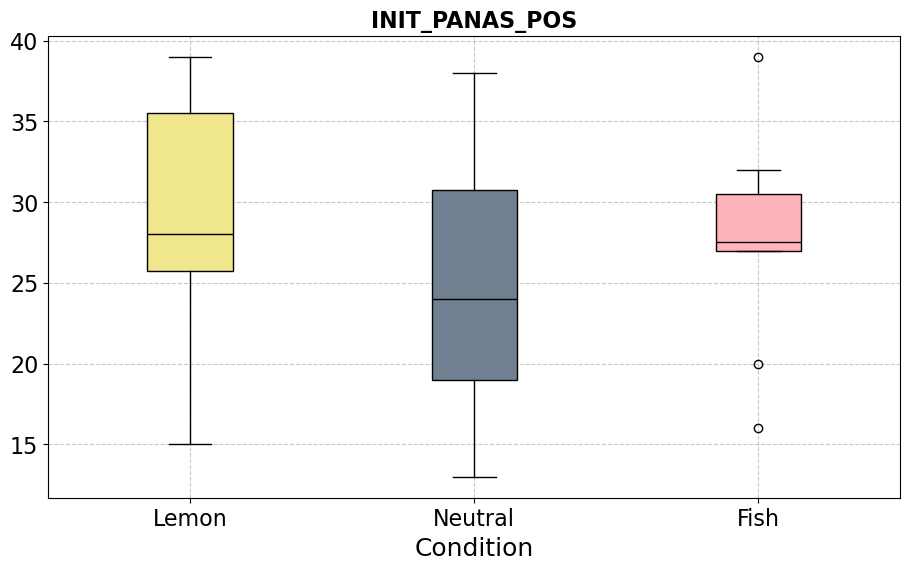

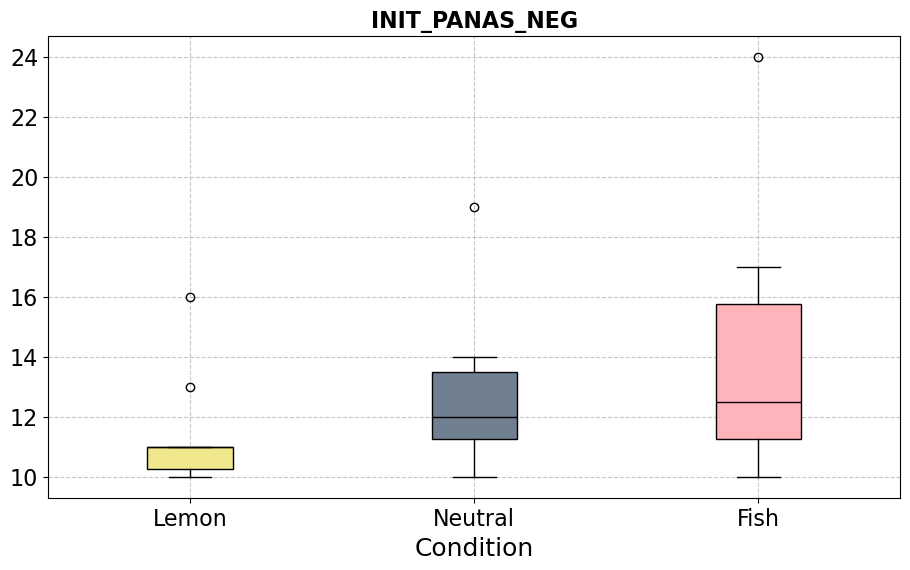

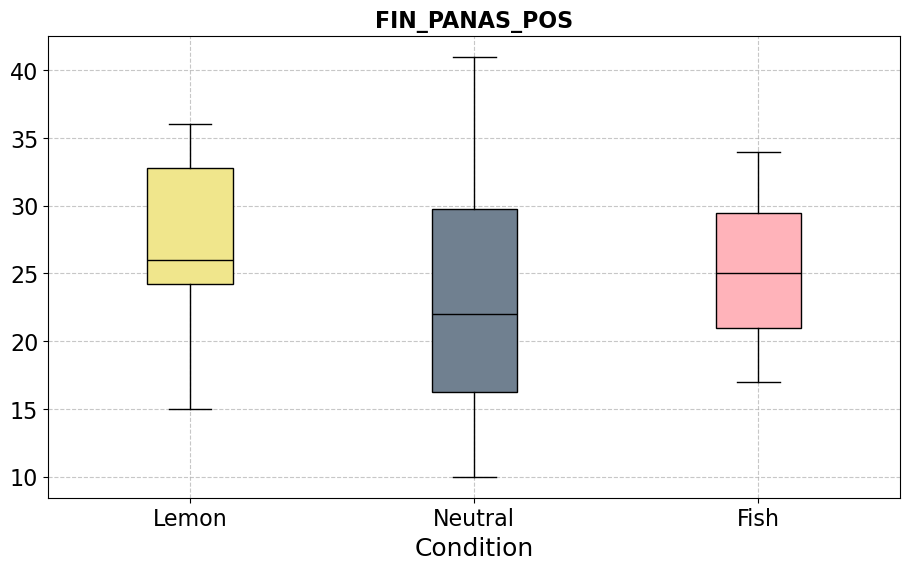

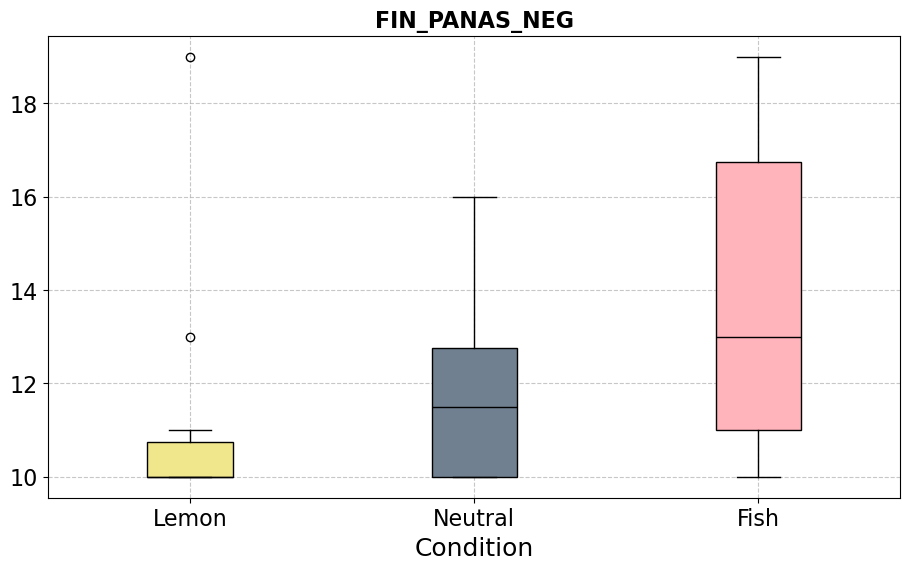

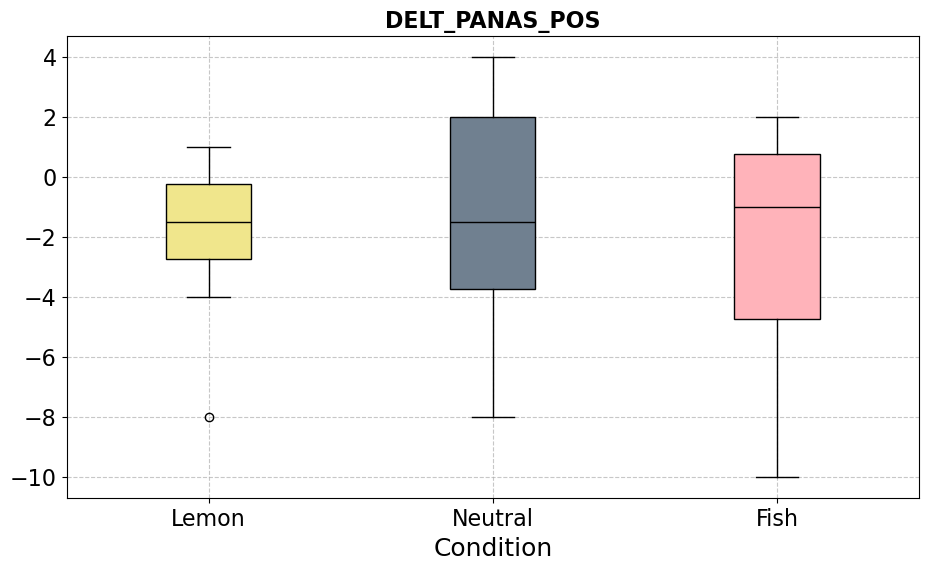

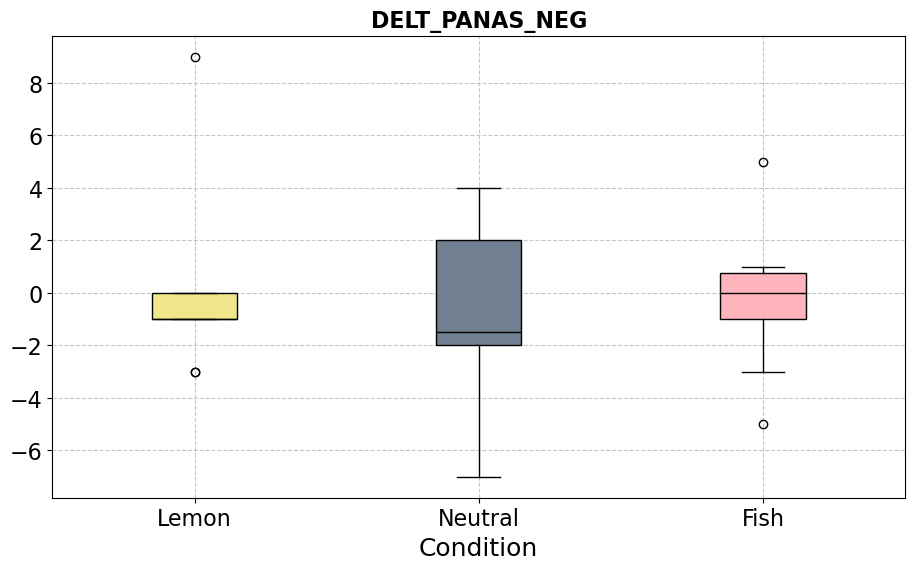

In [7]:
# Experimental data spreadsheet
# mood sheet
# paired t-tests?
# t - tests between 
relevant_columns = ['INIT_PANAS_POS', 'INIT_PANAS_NEG', 'FIN_PANAS_POS', 'FIN_PANAS_NEG', 'DELT_PANAS_POS', 'DELT_PANAS_NEG']
for col in relevant_columns:
    fish, lemon, neutral = make_three_group_lists(mood_data, col)
    three_lists_stats(fish, lemon, neutral, col, remove=False)

### FACE SELECTION

FACE SLOPES
FISH: [-0.30000000000000016, -0.30000000000000004, -0.1999999999999998, -0.10000000000000021, -0.10000000000000009, -1.0653471472133785e-16, -1.0653471472133785e-16, -2.7171280963791945e-18, 0.09999999999999988, 0.3]
LEMON: [-0.6000000000000003, -0.39999999999999997, -0.20000000000000076, -1.0653471472133785e-16, -1.0653471472133785e-16, -1.0653471472133785e-16, -1.0653471472133785e-16, -1.0653471472133785e-16, 4.7834535349306026e-18, 0.2999999999999999]
NEUTRAL: [-0.3000000000000003, -0.10000000000000055, -0.10000000000000044, -4.325732776039944e-16, -1.0653471472133785e-16, -1.0653471472133785e-16, 7.423097889990735e-17, 0.2, 0.4]
neutral, num elements: 8, mean: -0.03750000000000024, std: 0.13169567191065937, normal (above 0.5 is normal): 0.24081355333328247
lemon, num elements: 6, mean: -8.798168667862643e-17, std: 4.148583189196258e-17, normal (above 0.5 is normal): 2.0729139578179456e-05
fish, num elements: 9, mean: -0.10000000000000006, std: 0.1333333333333333, normal

{'lemon': [-1.0653471472133785e-16,
  -1.0653471472133785e-16,
  -1.0653471472133785e-16,
  -1.0653471472133785e-16,
  -1.0653471472133785e-16,
  4.7834535349306026e-18],
 'neutral': [-0.3000000000000003,
  -0.10000000000000055,
  -0.10000000000000044,
  -4.325732776039944e-16,
  -1.0653471472133785e-16,
  -1.0653471472133785e-16,
  7.423097889990735e-17,
  0.2],
 'fish': [-0.30000000000000016,
  -0.30000000000000004,
  -0.1999999999999998,
  -0.10000000000000021,
  -0.10000000000000009,
  -1.0653471472133785e-16,
  -1.0653471472133785e-16,
  -2.7171280963791945e-18,
  0.09999999999999988]}

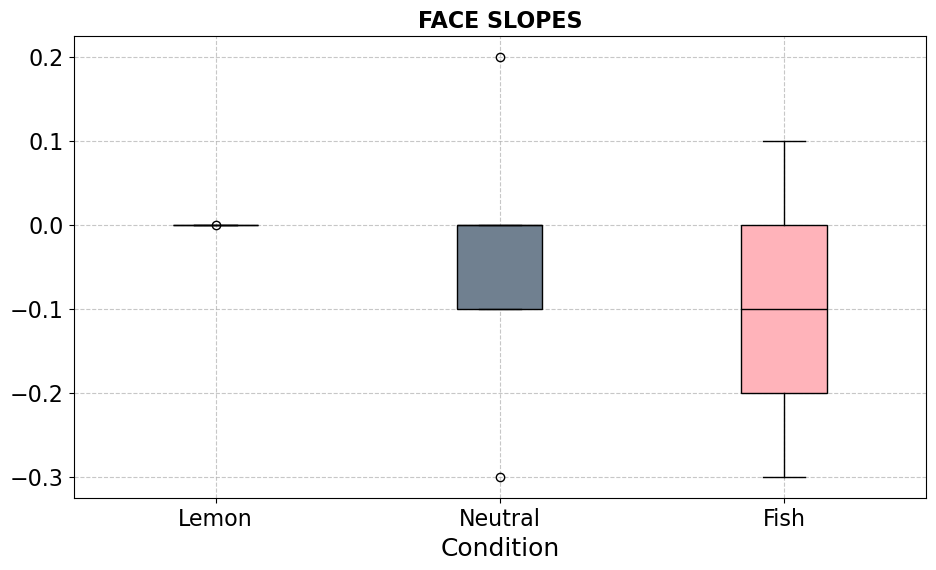

In [8]:
# Experimental data 
# mood - face selection, pre-during-post
# linear model for each participant
# compare betas over time
# line of best fit for every participant
# for each participant, collect a list of their face ratings
def make_participant_lists(df):
    
    data = {}
    for i, row in df.iterrows():
        # id = row['ID']
        group = f"{row['CONDITION']}"
        y = [row['FACE_PRE'], row['FACE_1'], row['FACE_2'], row['FACE_3'], row['FACE_POST']]
        # y = [float(el) for el in y]
        x = [1,2,3,4,5]
        # Calculate the line of best fit
        slope, intercept = np.polyfit(x, y, 1)
        
        if group in data.keys():
            data[group].append(slope)
        else:
            data[group] = [slope]
    fish = data['bad']
    lemon = data['good']
    neutral = data['neutral']
    return fish, lemon, neutral

fish, lemon, neutral = make_participant_lists(mood_data)
three_lists_stats(pd.Series(fish), pd.Series(lemon), pd.Series(neutral), 'FACE SLOPES')


### CODE STYLE

STYLE
FISH: [2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0]
LEMON: [1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
NEUTRAL: [1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0]
neutral, num elements: 10, mean: 2.6, std: 1.019803902718557, normal (above 0.5 is normal): 0.17699648439884186
lemon, num elements: 10, mean: 2.3, std: 0.9, normal (above 0.5 is normal): 0.0005925917066633701
fish, num elements: 10, mean: 3.2, std: 0.6, normal (above 0.5 is normal): 0.012278728187084198
Kruskal-Wallis: H 4.480557768924316, P VAL: 0.10642881889611926



{'lemon': [1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
 'neutral': [1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0],
 'fish': [2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0]}

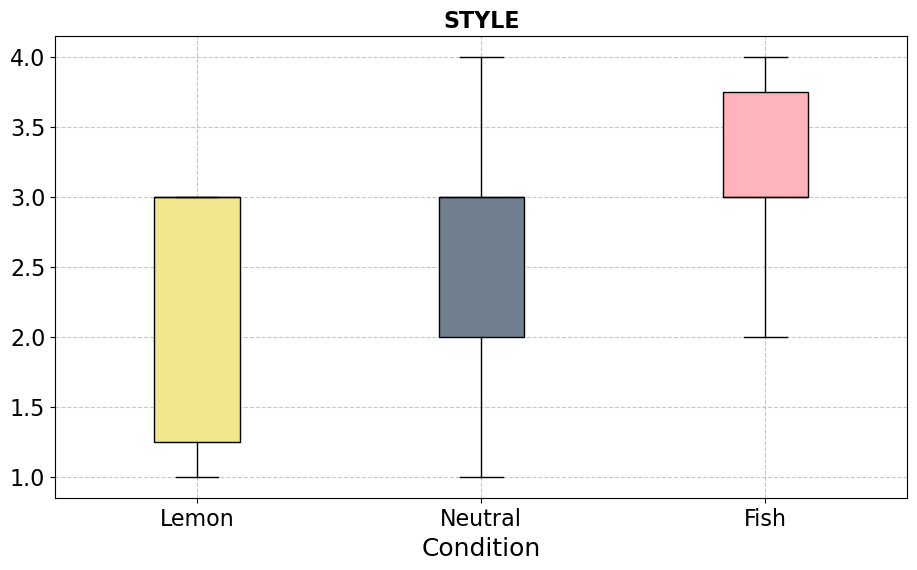

In [9]:
# Experimental data 
# tasks sheet - just style metric
fish, lemon, neutral = make_three_group_lists(task_data, 'STYLE')
three_lists_stats(fish, lemon, neutral, 'STYLE', remove=False)

Negative Valence
neutral_neg, num elements: 10, mean: 0.041999999999999996, std: 0.04060049260784898, normal (above 0.5 is normal): 0.09129507839679718
lemon_neg, num elements: 10, mean: 0.0483, std: 0.034281336029974095, normal (above 0.5 is normal): 0.08738362044095993
fish_neg, num elements: 10, mean: 0.047799999999999995, std: 0.049521308544908216, normal (above 0.5 is normal): 0.0811915397644043

Neutral: [0.0, 0.0, 0.0, 0.0, 0.038, 0.051, 0.053, 0.062, 0.101, 0.115]
Lemon: [0.0, 0.0, 0.0, 0.044, 0.054, 0.063, 0.069, 0.075, 0.085, 0.093]
Fish: [0.0, 0.0, 0.0, 0.0, 0.037, 0.039, 0.064, 0.076, 0.119, 0.143]

Neutral, num elements: 10, mean: 0.041999999999999996, std: 0.04060049260784898, normal (above 0.5 is normal): 0.09129507839679718
Lemon, num elements: 10, mean: 0.0483, std: 0.034281336029974095, normal (above 0.5 is normal): 0.08738362044095993
fish, num elements: 10, mean: 0.047799999999999995, std: 0.049521308544908216, normal (above 0.5 is normal): 0.0811915397644043
ANOVA 

Positive Valence
neutral_pos, num elements: 10, mean: 0.1784, std: 0.07524785711234573, normal (above 0.5 is normal): 0.8917638659477234
lemon_pos, num elements: 10, mean: 0.17559999999999998, std: 0.1250785353288085, normal (above 0.5 is normal): 0.6487041711807251
fish_pos, num elements: 10, mean: 0.23209999999999997, std: 0.11440756093895194, normal (above 0.5 is normal): 0.2335636019706726

Neutral: [0.064, 0.102, 0.116, 0.135, 0.157, 0.195, 0.219, 0.222, 0.242, 0.332]
Lemon: [0.0, 0.0, 0.078, 0.1, 0.161, 0.235, 0.239, 0.244, 0.292, 0.407]
Fish: [0.092, 0.093, 0.139, 0.194, 0.2, 0.214, 0.237, 0.298, 0.42, 0.434]

Neutral, num elements: 10, mean: 0.1784, std: 0.07524785711234573, normal (above 0.5 is normal): 0.8917638659477234
Lemon, num elements: 10, mean: 0.17559999999999998, std: 0.1250785353288085, normal (above 0.5 is normal): 0.6487041711807251
fish, num elements: 10, mean: 0.23209999999999997, std: 0.11440756093895194, normal (above 0.5 is normal): 0.2335636019706726
ANOVA F

{'Negative Valence': {'neutral': [0.0,
   0.0,
   0.0,
   0.0,
   0.038,
   0.051,
   0.053,
   0.062,
   0.101,
   0.115],
  'lemon': [0.0, 0.0, 0.0, 0.044, 0.054, 0.063, 0.069, 0.075, 0.085, 0.093],
  'fish': [0.0, 0.0, 0.0, 0.0, 0.037, 0.039, 0.064, 0.076, 0.119, 0.143]},
 'Positive Valence': {'neutral': [0.064,
   0.102,
   0.116,
   0.135,
   0.157,
   0.195,
   0.219,
   0.222,
   0.242,
   0.332],
  'lemon': [0.0, 0.0, 0.078, 0.1, 0.161, 0.235, 0.239, 0.244, 0.292, 0.407],
  'fish': [0.092, 0.093, 0.139, 0.194, 0.2, 0.214, 0.237, 0.298, 0.42, 0.434]},
 'Compound Metric': {'neutral': [0.2263,
   0.3083,
   0.4215,
   0.6597,
   0.7137,
   0.7269,
   0.7382,
   0.8171,
   0.8655],
  'lemon': [0.6729, 0.7717, 0.7906, 0.8221, 0.8235, 0.9245],
  'fish': [0.128,
   0.1779,
   0.4359,
   0.4404,
   0.5799,
   0.6549,
   0.7089,
   0.7964,
   0.8271,
   0.8555]}}

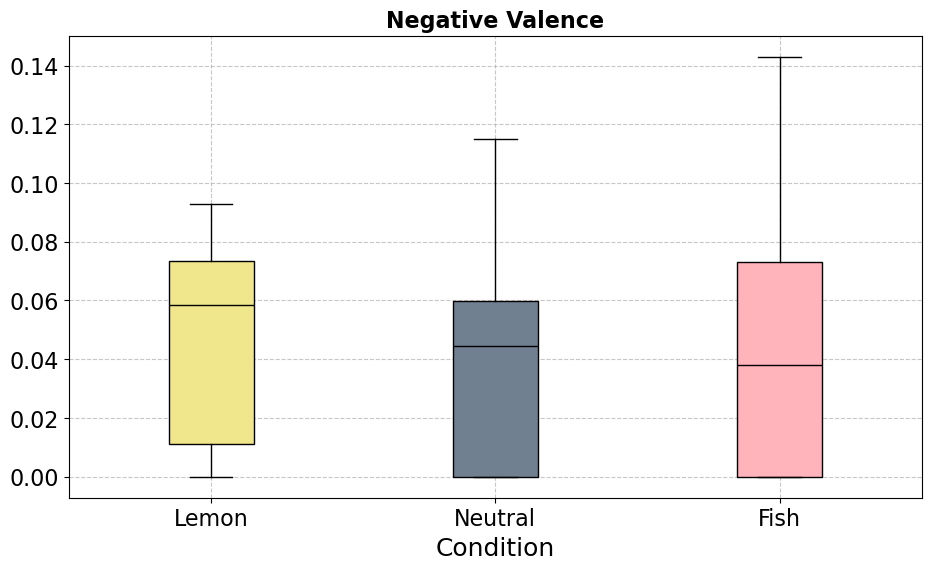

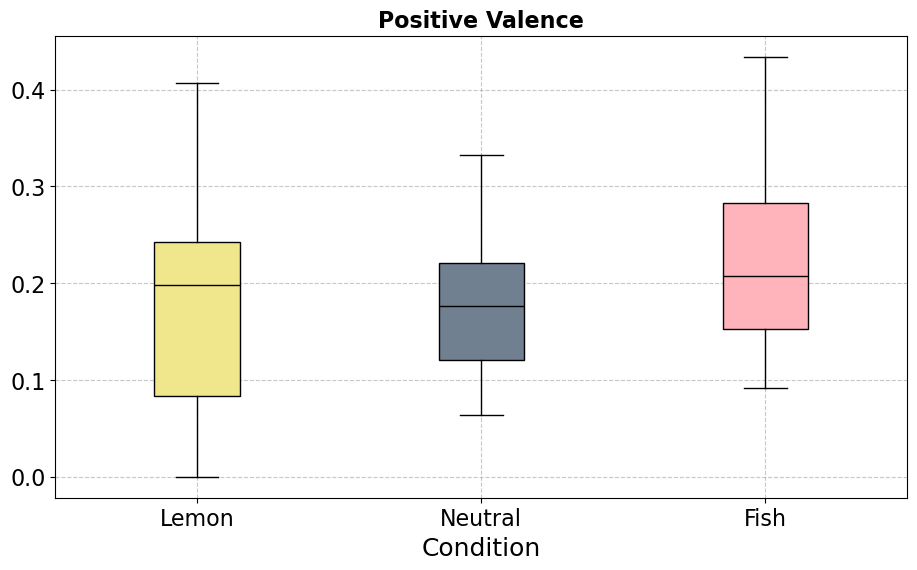

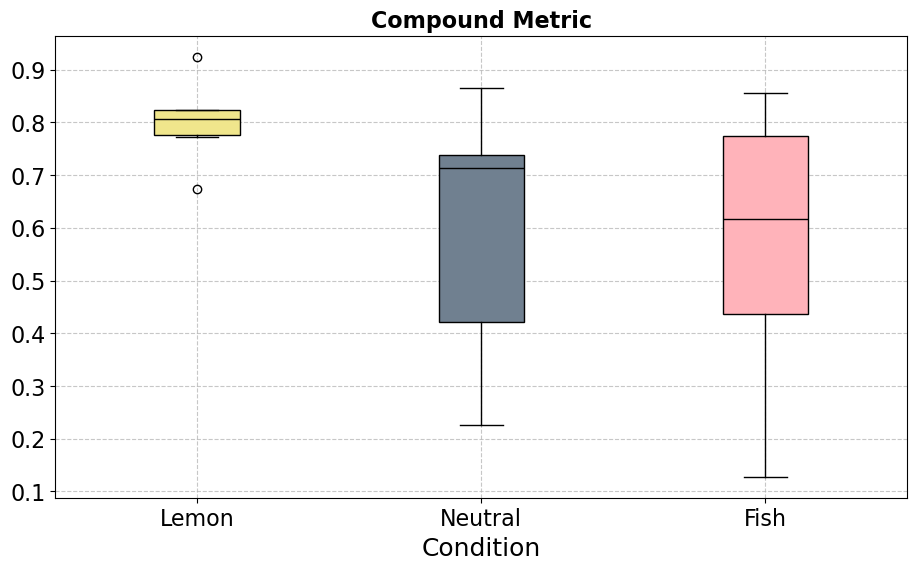

In [10]:
# positive/negative/neutral valence
relevant_columns = ['neutral_neg',  'lemon_neg',   'fish_neg', 
                    'neutral_pos',  'lemon_pos',   'fish_pos', 
                    'neutral_compound',  'lemon_compound',   'fish_compound']
nlp_df = pd.read_csv("sentimentAnalysis/experienceNLP.csv")
calculate_stats(nlp_df, relevant_columns)

In [11]:
def count_words(string):
    return len(tokenizer.tokenize(string))

# word count
fish, lemon, neutral = make_three_group_lists(survey_data, 'EXPERIENCE')
tokenizer = RegexpTokenizer(r'\w+')

fish_list = [count_words(paragraph) for paragraph in fish.dropna()]
lemon_list = [count_words(paragraph) for paragraph in lemon.dropna()]
neutral_list = [count_words(paragraph) for paragraph in neutral.dropna()]


WORD COUNT
FISH: [9.0, 19.0, 23.0, 25.0, 29.0, 32.0, 32.0, 34.0, 36.0, 37.0]
LEMON: [22.0, 27.0, 33.0, 37.0, 43.0, 47.0, 49.0, 51.0, 73.0]
NEUTRAL: [11.0, 18.0, 35.0, 38.0, 39.0, 41.0, 46.0, 47.0, 50.0, 87.0]
neutral, num elements: 7, mean: 42.285714285714285, std: 5.062870041905528, normal (above 0.5 is normal): 0.737312912940979
lemon, num elements: 8, mean: 38.625, std: 9.974185430399817, normal (above 0.5 is normal): 0.5737138390541077
fish, num elements: 9, mean: 29.666666666666668, std: 5.811865258054231, normal (above 0.5 is normal): 0.5541107654571533
neutral, num elements: 7, mean: 42.285714285714285, std: 5.062870041905528, normal (above 0.5 is normal): 0.737312912940979
lemon, num elements: 8, mean: 38.625, std: 9.974185430399817, normal (above 0.5 is normal): 0.5737138390541077
fish, num elements: 9, mean: 29.666666666666668, std: 5.811865258054231, normal (above 0.5 is normal): 0.5541107654571533
ANOVA F: 5.663481805111599, P VAL: 0.010786262717800208

neutral v fish | t-s

{'lemon': [22.0, 27.0, 33.0, 37.0, 43.0, 47.0, 49.0, 51.0],
 'neutral': [35.0, 38.0, 39.0, 41.0, 46.0, 47.0, 50.0],
 'fish': [19.0, 23.0, 25.0, 29.0, 32.0, 32.0, 34.0, 36.0, 37.0]}

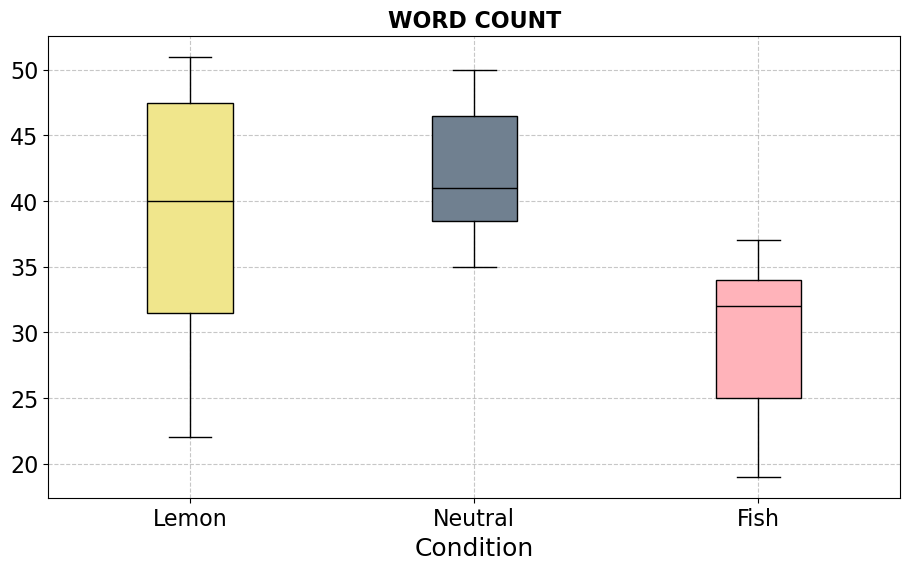

In [12]:
three_lists_stats(pd.Series(fish_list), pd.Series(lemon_list), pd.Series(neutral_list), 'WORD COUNT')